In [1]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr

import csv
import os

In [4]:
# path = "/data/keeling/a/rct4/work"
# dir_list = os.listdir(path)

# for i in dir_list:
#     if ".nc" in i:
#         os.rename(path + "/" + i, path + "/datafiles/" + i)

In [3]:
# x = xr.load_dataset("2014-01-22.grib", engine="cfgrib")
recent_rows = []
with open('../tables/out.csv', mode='r') as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        recent_rows.append(lines)
        print(lines)
        print()



{'Event Type': 'Severe Weather', 'Valid Date': '1/2/2022', 'Valid Time': '13:21:00', 'State': 'California', 'Counties': 'Tuolumne County;', 'Valid DateTime': '1/2/2022 13:21', 'State_FIPS': '6', 'County_FIPS': '6109'}

{'Event Type': 'Severe Weather', 'Valid Date': '1/3/2022', 'Valid Time': '1:00:00', 'State': 'Georgia: Alabama: Mississippi:', 'Counties': '', 'Valid DateTime': '1/3/2022 1:00', 'State_FIPS': '13, 01, 28', 'County_FIPS': ''}

{'Event Type': 'Severe Weather', 'Valid Date': '1/16/2022', 'Valid Time': '5:15:00', 'State': 'Georgia: Alabama:', 'Counties': '', 'Valid DateTime': '1/16/2022 5:15', 'State_FIPS': '13, 01', 'County_FIPS': ''}

{'Event Type': 'Severe Weather', 'Valid Date': '1/29/2022', 'Valid Time': '8:45:00', 'State': 'Connecticut: Massachusetts: New Hampshire: Rhode Island: Vermont: Maine:', 'Counties': '', 'Valid DateTime': '1/29/2022 8:45', 'State_FIPS': '09, 25, 33, 44, 50, 23', 'County_FIPS': ''}

{'Event Type': 'Severe Weather/Transmission Interruption', 'Va

In [4]:

final_table = []
id_count = 0

for entry in recent_rows:
    
    date = entry['Valid Date']
    date2 = date.split('/')
    day = str(date2[1])
    if (len(day) == 1):
        day = '0' + str(day)
    month = str(date2[0])
    if len(month) == 1:
        month = '0' + str(month)
    year = str(date2[2])
    # print(day+ "/" + month + "/" + year) 
    state = entry['State'].split(":")
    # print(state)
    counties = entry['Counties'].split(",")
    # print(counties)
    if (counties[0] == ''):
        #Cycle through states
        
        for s in state:
            if (s != ''):
                data_entry = {}
                print(s)
                location = geopandas.tools.geocode(s)
                print(location)
                data_entry["Location"] = location
                data_entry["Day"] = day
                data_entry["Month"] = month
                data_entry["Year"] = year
                data_entry["ID"] = id_count
                print(id_count)
                print(month)
                print(day)
                
                final_table.append(data_entry)
                id_count+=1
                
    else:
        data_entry = {}
        print(state[0])
        county = counties[0][:-1]
        location = geopandas.tools.geocode(county + ", " + state[0])
        print(location)
        data_entry["Location"] = location
        data_entry["Day"] = day
        data_entry["Month"] = month
        data_entry["Year"] = year
        data_entry["ID"] = id_count
        print(id_count)
        print(month)
        print(day)
        
        final_table.append(data_entry)
        id_count+=1
    


California
                      geometry                              address
0  POINT (-119.99194 38.05694)  Tuolumne, California, United States
0
01
02
Georgia
                     geometry                 address
0  POINT (-83.11374 32.32938)  Georgia, United States
1
01
03
 Alabama
                     geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States
2
01
03
 Mississippi
                     geometry                     address
0  POINT (-89.73485 32.97153)  Mississippi, United States
3
01
03
Georgia
                     geometry                 address
0  POINT (-83.11374 32.32938)  Georgia, United States
4
01
16
 Alabama
                     geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States
5
01
16
Connecticut
                     geometry                     address
0  POINT (-72.73422 41.65002)  Connecticut, United States
6
01
29
 Massachusetts
                     geometry                       address

In [5]:
print("test")

test


In [ ]:
stored_table = []
c = cdsapi.Client()
for row in final_table:
    print("run")
    if (row['Month'] + '-' + row['Day'] + '-' + row['Year']) in stored_table:
        continue
    print(row["Location"])
    print(row["Day"])
    print(row["Month"])
    print(row["Year"])
    print(row["ID"])
    c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis', 'format': 'netcdf', #netcdf
        'year': [
        row["Year"],
        ],
        'month': [
        row["Month"]
        ],
        'day': [
        row["Day"]
        ],
        'time': [
        '00:00', '03:00', '06:00', '09:00',
        '12:00', '15:00', '18:00', '21:00'
        ],
        'variable': [
        '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
        'snowfall', 'surface_pressure', 'total_precipitation',
        ],
        },
        row['Month'] + '-' + row['Day'] + '-' + row['Year'] + '.nc')
    stored_table.append(row['Month'] + '-' + row['Day'] + '-' + row['Year'])


In [ ]:
# c.retrieve(
# 'reanalysis-era5-single-levels',
# {
#     'product_type': 'reanalysis', 'format': 'grib',
#     'year': [
#     str(year),
#     ],
#     'month': [
#     str(month)
#     ],
#     'day': [
#     str(day)
#     ],
#     'time': [
#     '00:00', '04:00', '08:00',
#     '12:00', '16:00', '20:00',
#     ],
#     'variable': [
#     '2t', 'msl',
#     ],
#     },
#     str(year) + "-" + str(month) + "-" + str(day) + '.grib')

2022-01-02T12:00:00
<xarray.DataArray 't2m' (time: 8, latitude: 721, longitude: 1440)>
[8305920 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-01-02 ... 2022-01-02T21:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature
<xarray.DataArray 't2m' ()>
array(-1.510437, dtype=float32)
Coordinates:
    longitude  float32 240.0
    latitude   float32 38.0
    time       datetime64[ns] 2022-01-02T03:00:00
<xarray.DataArray 't2m' ()>
array(-3.02087402)
Coordinates:
    longitude  float32 240.0
    latitude   float32 38.0
    time       datetime64[ns] 2022-01-02T03:00:00


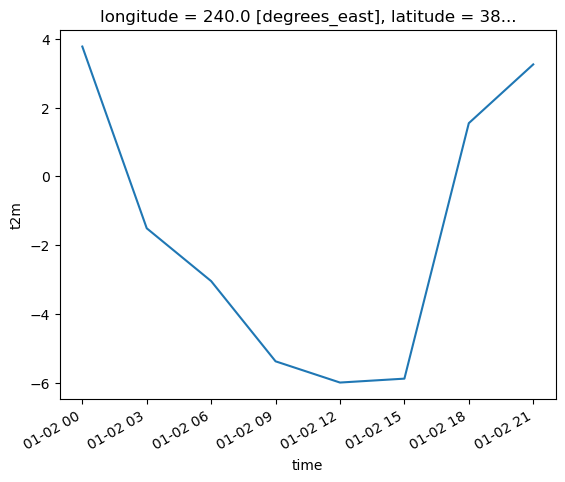

In [8]:
temp = []
press = []
for row in final_table:
    year = row["Year"]
    month = row["Month"]
    day = row["Day"]
    datetime = year + "-" + month + "-" + day + "T12:00:00"
    print(datetime)
    currLocation = row["Location"]
    x = xr.open_dataset("../datafiles/" + month + '-' + day + '-' + year + '.nc')

    print(x.t2m)

    point = x.t2m.sel(latitude=currLocation.geometry.y.values[0], longitude=currLocation.geometry.x.values[0]+360, method="nearest") - 273
    point2 = x.sp.sel(latitude=currLocation.geometry.y.values[0], longitude=currLocation.geometry.x.values[0]+360, method="nearest")

    
    point.plot()

    break

In [10]:
CMI = geopandas.tools.geocode("Champaign, IL")
PDX = geopandas.tools.geocode("Portland, OR")

wash = geopandas.tools.geocode("Washington County, OR")
texas = geopandas.tools.geocode("Texas")

print(CMI)
print(PDX)
print(wash)
print(texas)

                     geometry                             address
0  POINT (-88.24309 40.11648)  Champaign, Illinois, United States
                      geometry                          address
0  POINT (-122.67419 45.52025)  Portland, Oregon, United States
                      geometry                            address
0  POINT (-123.05879 45.56019)  Washington, Oregon, United States
                     geometry               address
0  POINT (-98.54561 31.26389)  Texas, United States


skipping variable: paramId==144 shortName='sf'
Traceback (most recent call last):
  File "/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1641081600, 1641096000, 1641110400, 1641124800, 1641139200,
       1641153600])) new_value=Variable(dimensions=('time',), data=array([1641060000, 1641103200, 1641146400]))
skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/data/keeling/a/r

<xarray.Dataset>
Dimensions:     (time: 6, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2022-01-02 ... 2022-01-02T20:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 2022-01-02 ... 2022-01-02T20:00:00
Data variables:
    u10         (time, latitude, longitude) float32 -0.1208 -0.1208 ... 0.2339
    v10         (time, latitude, longitude) float32 -0.1419 -0.1419 ... -0.02336
    t2m         (time, latitude, longitude) float32 247.0 247.0 ... 247.5 247.5
    sp          (time, latitude, longitude) float32 1.035e+05 ... 6.886e+04
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:         

In [42]:
# point2.plot()
# print(point2)
p2 = point2.values
print(p2)

99656.66


In [10]:
print(point)

<xarray.DataArray 't2m' (time: 6)>
array([-12.077637, -12.943665, -12.966034, -12.739807, -10.089355,
        -5.753662], dtype=float32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2014-01-22 ... 2014-01-22T20:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    float64 40.0
    longitude   float64 271.8
    valid_time  (time) datetime64[ns] 2014-01-22 ... 2014-01-22T20:00:00


In [ ]:
currLocation = CMI
point = x.t2m.sel(latitude=currLocation.geometry.y.values[0], longitude=currLocation.geometry.x.values[0]+360, method="nearest") - 273
point2 = x.msl.sel(latitude=currLocation.geometry.y.values[0], longitude=currLocation.geometry.x.values[0]+360, method="nearest")

In [54]:
print(temp) # keep xarray
print(press)
temp2 = []
press2 = []



[array(-5.99835205), array(6.50808716), array(1.27957153), array(-1.75363159), array(8.16333008), array(6.78833008), array(-6.93188477), array(-8.63110352), array(-10.68188477), array(-4.60180664), array(-18.60180664), array(-18.23071289), array(-1.69372559), array(-2.10388184), array(-1.84872437), array(14.3237915), array(5.10699463), array(13.53668213), array(9.68121338), array(-9.09222412), array(14.29840088), array(0.08135986), array(7.38018799), array(-1.25457764), array(23.63604736), array(15.72662354), array(22.22848511), array(20.57223511), array(18.85153198), array(21.63833618), array(15.80044556), array(9.51528931), array(21.97232056), array(2.31219482), array(1.01306152), array(1.86911011), array(5.55661011), array(-0.3135376), array(18.46966553), array(21.77301025), array(17.7401123), array(20.20300293), array(12.0916748), array(20.20300293), array(18.92404175), array(18.66036987), array(21.17599487), array(20.771698), array(22.74475098), array(24.68615723), array(23.187255

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed